In [ ]:
from google.colab import drive
drive.mount('/KeyFrame_Extract')

Drive already mounted at /KeyFrame_Extract; to attempt to forcibly remount, call drive.mount("/KeyFrame_Extract", force_remount=True).


In [ ]:
import cv2
import operator
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import argrelextrema
import glob
from google.colab.patches import cv2_imshow

In [ ]:
print(sys.executable)
#Setting fixed threshold criteria
USE_THRESH = True
#fixed threshold value
THRESH = 0.7
#Setting fixed threshold criteria
USE_TOP_ORDER = False
#Setting local maxima criteria
USE_LOCAL_MAXIMA = False
#Number of top sorted frames
NUM_TOP_FRAMES = 20

/usr/bin/python3


In [ ]:
#Video path of the source file
videopath ="/KeyFrame_Extract/MyDrive/KeyFrame/video/10 SECONDS VIDEO CLIP.mp4"
#Directory to store the processed frames
dir = "/KeyFrame_Extract/MyDrive/KeyFrame/Process_Frame/keyframe/"
#smoothing window size
len_window = int(10)

In [ ]:
cap = cv2.VideoCapture(videopath)

In [ ]:
total_frame_list=[]
cframe = 0
while(True):
        # if os.path.exists(data):
        #   print("data path is exist")
        #   break

        # os.makedirs(data)
        ret, frame= cap.read()
        if (ret==False):
                break
        path = '/KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame' + str(cframe) + '.jpg'
        print("creating : " +path)
        cv2.imwrite(path,frame)

        total_frame_list.append(frame)
        cframe += 1
 
cap.release()
cv2.destroyAllWindows()

creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame0.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame1.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame2.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame3.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame4.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame5.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame6.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame7.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame8.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame9.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame10.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame11.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame12.jpg
creating : /KeyFrame_Extract/MyDrive/KeyFrame/total_frame/frame13.jpg
creating : /KeyFrame_Extract/M

In [ ]:
print('total frame of the video is : ',len(total_frame_list))

total frame of the video is :  322


In [ ]:
#show all the frames(total 322 frame)
for i in total_frame_list:
  cv2_imshow(i)

In [ ]:
#In Python, the glob module is used to retrieve files/pathnames
for imagePath in glob.glob("/KeyFrame_Extract/MyDrive/KeyFrame/total_frame/*.jpg"):
  #or for imagePath in glob.glob("/KeyFrame/MyDrive/KeyFrame/data/*.*"):
  #print('imagePath   :  ' ,imagePath)

  #imagePath[imagePath.rfind("/") + 1:] er jonno data folder er vitorer image gulo name print korbe
  #filename = imagePath[imagePath.rfind("/") + 1:]
  #print(filename)

  #cv2.imread() method loads an image from the specified file.
  image = cv2.imread(imagePath,1)
  #cv2.cvtColor() method is used to convert an image from one color space to another
  hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
  #[8,8,8] mane 3D tai plot print korar agee flatten mane 1D kore nite hobe
  hist = cv2.normalize(hist,None).flatten()
  # print the histrogram of all frame(322 frame)
  plt.plot(hist, color='k')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def smooth(x, window_len=13, window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    import numpy as np    
    t = np.linspace(-2,2,0.1)
    x = np.sin(t)+np.random.randn(len(t))*0.1
    y = smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string   
    """
    print(len(x), window_len)
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise (ValueError, "Input vector needs to be bigger than window size.")

    if window_len < 3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s = np.r_[2 * x[0] - x[window_len:1:-1],
              x, 2 * x[-1] - x[-1:-window_len:-1]]
    #print(len(s))

    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = getattr(np, window)(window_len)
    y = np.convolve(w / w.sum(), s, mode='same')
    return y[window_len - 1:-window_len + 1]



In [ ]:
class Frame:
    def __init__(self, id, frame, value):
        self.id = id
        self.frame = frame
        self.value = value

    def __lt__(self, other):
        if self.id == other.id:
            return self.id < other.id
        return self.id < other.id

    def __gt__(self, other):
        return other.__lt__(self)

    def __eq__(self, other):
        return self.id == other.id and self.id == other.id

    def __ne__(self, other):
        return not self.__eq__(other)


def rel_change(a, b):
  x=0
  if(max(a,b)==0):
    print('result is zero')
  else:
    x = (b - a) / max(a, b)
  print('inside rel_change max(a, b) : ',max(a, b))
  return x



In [ ]:
print("Video :" + videopath)
print("Frame Directory: " + dir)


Video :/KeyFrame_Extract/MyDrive/KeyFrame/video/10 SECONDS VIDEO CLIP.mp4
Frame Directory: /KeyFrame_Extract/MyDrive/KeyFrame/Process_Frame/keyframe/


In [ ]:
cap = cv2.VideoCapture(str(videopath))


curr_frame = None
prev_frame = None

frame_diffs = []
frames = []
ret, frame = cap.read()
i = 1

while(ret):
    luv = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
    curr_frame = luv
    if curr_frame is not None and prev_frame is not None:
        #logic here
        diff = cv2.absdiff(curr_frame, prev_frame)
        count = np.sum(diff)
        frame_diffs.append(count)
        frame = Frame(i, frame, count)
        frames.append(frame)
    prev_frame = curr_frame
    i = i + 1
    ret, frame = cap.read()
"""
    cv2.imshow('frame',luv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
"""
cap.release()
#cv2.destroyAllWindows()


In [ ]:
if USE_TOP_ORDER:
    # sort the list in descending order
    frames.sort(key=operator.attrgetter("value"), reverse=True)
    for keyframe in frames[:NUM_TOP_FRAMES]:
        name = "frame_" + str(keyframe.id) + ".jpg"
        cv2.imwrite(dir + "/" + name, keyframe.frame)


In [ ]:
frame_list = []
if USE_THRESH:
    print("Using Threshold")
    for i in range(1, len(frames)):
        if (rel_change(np.float(frames[i - 1].value), np.float(frames[i].value)) >= THRESH):
            #print("prev_frame:"+str(frames[i-1].value)+"  curr_frame:"+str(frames[i].value))
            name = "frame_" + str(frames[i].id) + ".jpg"
            cv2.imwrite(dir + "/" + name, frames[i].frame)
            frame_list.append(frames[i].frame)


Using Threshold
inside rel_change max(a, b) :  3724827.0
inside rel_change max(a, b) :  3254540.0
inside rel_change max(a, b) :  2540685.0
inside rel_change max(a, b) :  2466173.0
inside rel_change max(a, b) :  3184133.0
inside rel_change max(a, b) :  4092477.0
inside rel_change max(a, b) :  5076818.0
inside rel_change max(a, b) :  5408237.0
inside rel_change max(a, b) :  5408237.0
inside rel_change max(a, b) :  5093897.0
inside rel_change max(a, b) :  4690717.0
inside rel_change max(a, b) :  3971077.0
inside rel_change max(a, b) :  3213693.0
inside rel_change max(a, b) :  3073984.0
inside rel_change max(a, b) :  3083324.0
inside rel_change max(a, b) :  3083324.0
inside rel_change max(a, b) :  3035847.0
inside rel_change max(a, b) :  2992559.0
inside rel_change max(a, b) :  2820415.0
inside rel_change max(a, b) :  2820415.0
inside rel_change max(a, b) :  2698528.0
inside rel_change max(a, b) :  2911388.0
inside rel_change max(a, b) :  2911388.0
inside rel_change max(a, b) :  2691677.0


In [ ]:

if USE_LOCAL_MAXIMA:
    print("Using Local Maxima")
    diff_array = np.array(frame_diffs)
    sm_diff_array = smooth(diff_array, len_window)
    frame_indexes = np.asarray(argrelextrema(sm_diff_array, np.greater))[0]
    for i in frame_indexes:
        name = "frame_" + str(frames[i - 1].id) + ".jpg"
        #print(dir+name)
        cv2.imwrite(dir + name, frames[i - 1].frame)
        frame_list.append(frames[i - 1].frame)


In [ ]:
#frame_list[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: numticks
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


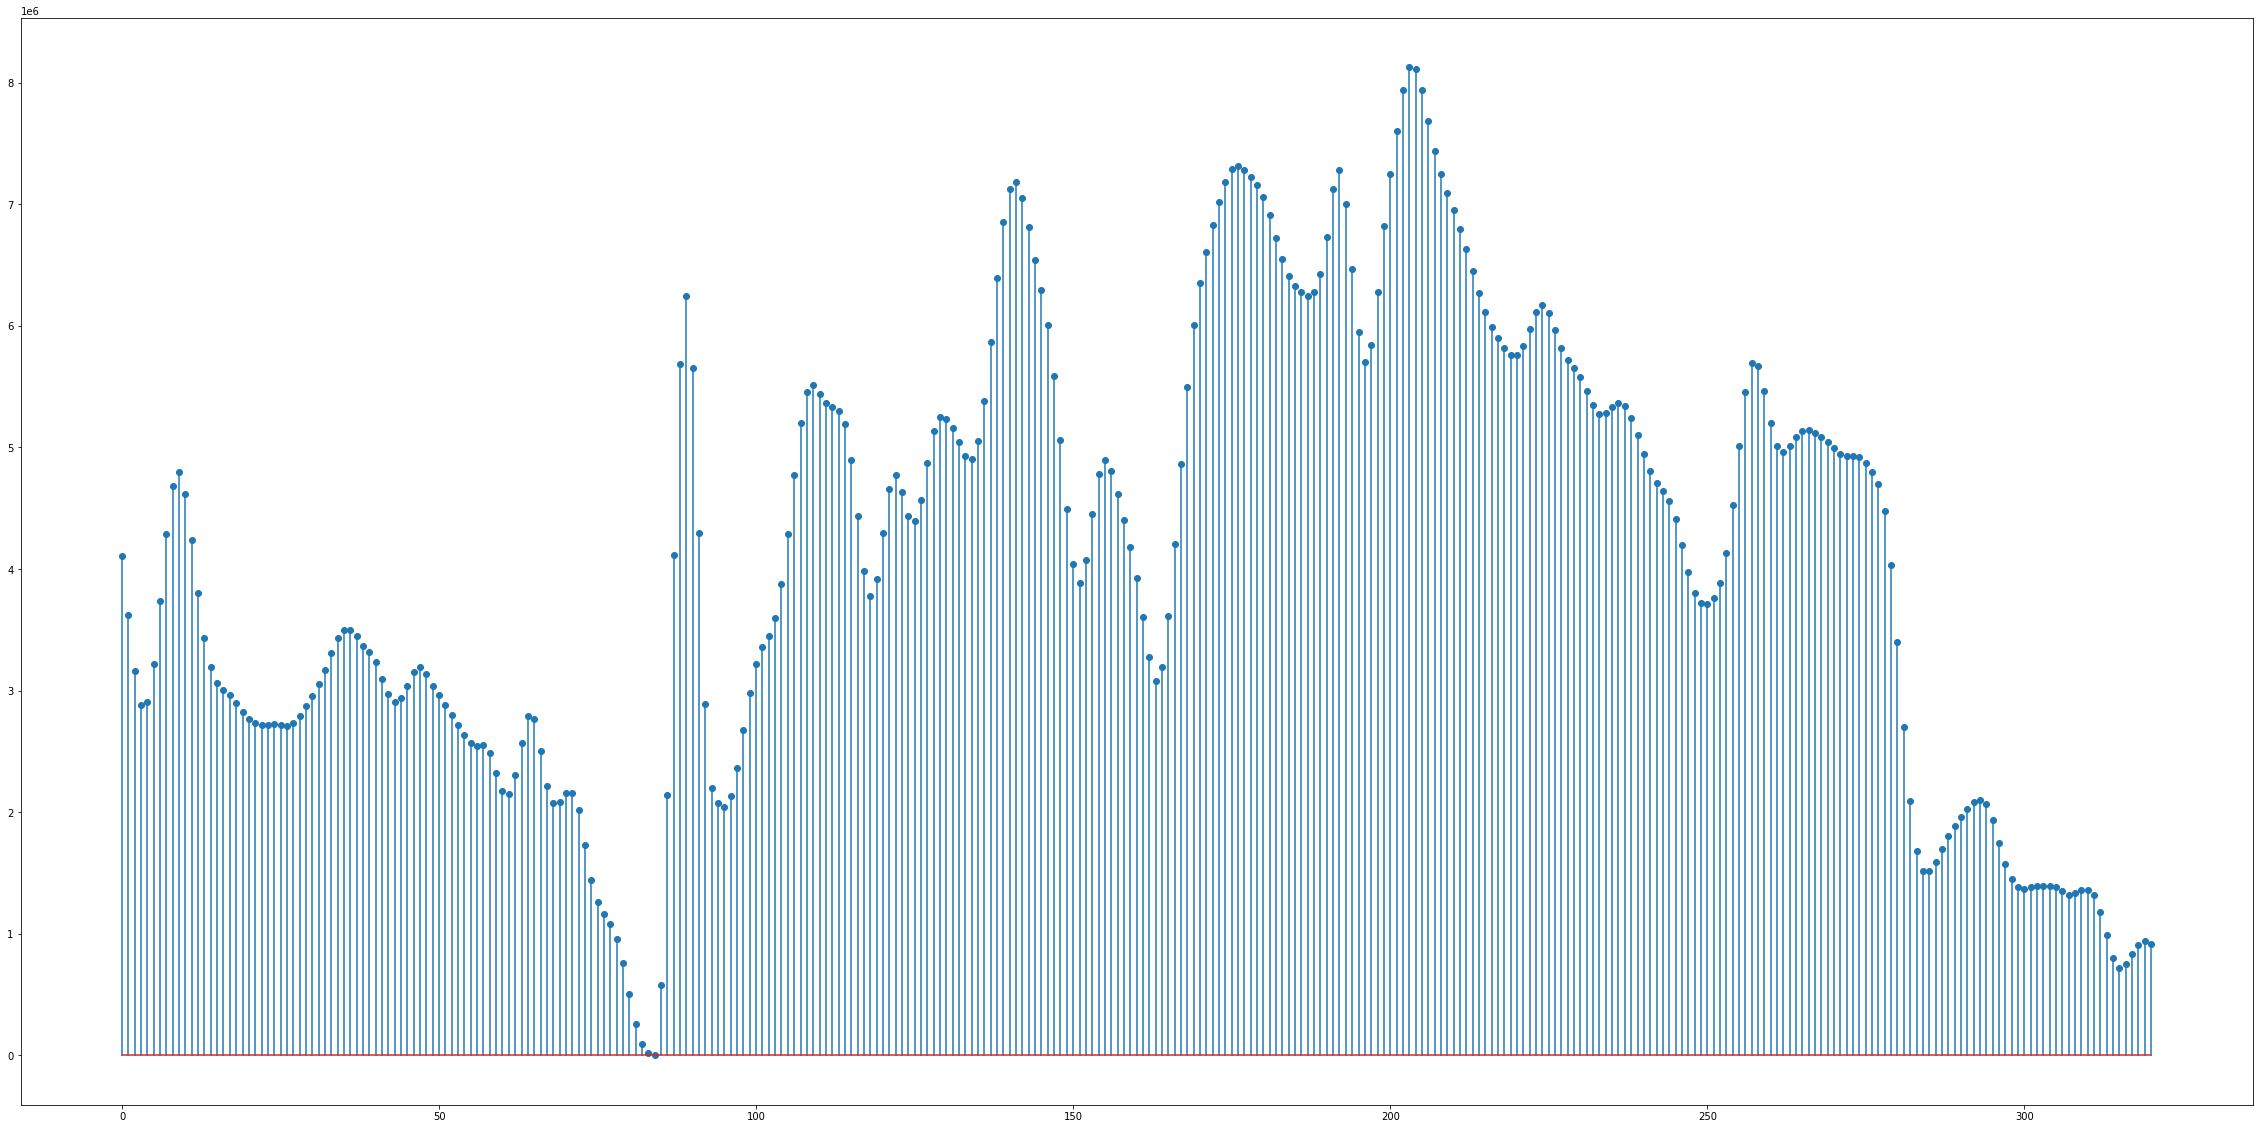

In [ ]:
plt.figure(figsize=(40, 20))
plt.locator_params(numticks=100)
plt.stem(sm_diff_array)
plt.savefig(dir + 'plot.png')


In [252]:
#print total number of keyframe
print('total number of keyframe : ',len(frame_list))

total number of keyframe :  6


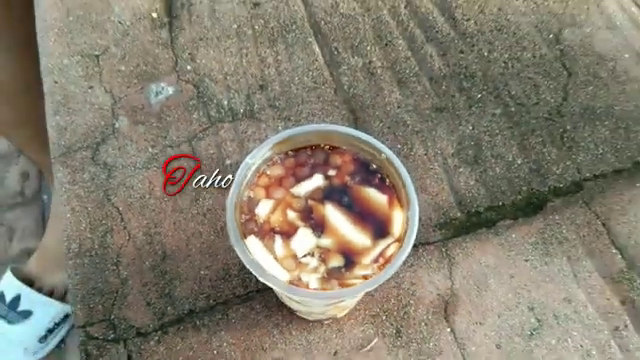

In [ ]:
cv2_imshow(frame_list[0])

In [ ]:
# #https://www.youtube.com/watch?v=Z90KEqJoC3w&ab_channel=Apeer_micro
# #In Python, the glob module is used to retrieve files/pathnames
# for imagePath in glob.glob("/KeyFrame_Extract/MyDrive/KeyFrame/Process_Frame/keyframe/*.jpg"):
#   #or for imagePath in glob.glob("/KeyFrame/MyDrive/KeyFrame/data/*.*"):
#   print('imagePath   :  ' ,imagePath)

In [ ]:
len(frame_list)

6

In [ ]:
#show all the key frame image
for i in frame_list:
  cv2_imshow(i)

Output hidden; open in https://colab.research.google.com to view.

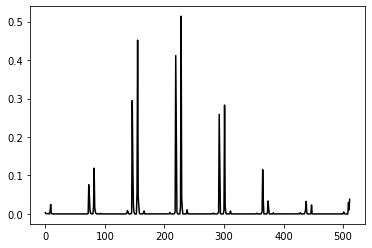

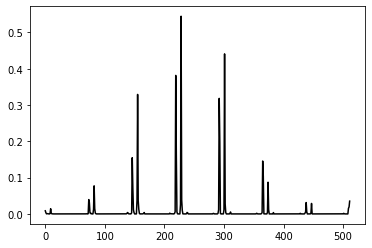

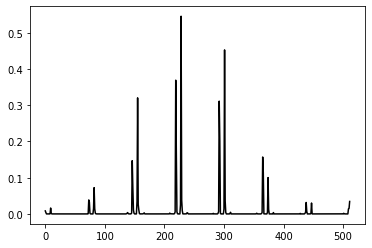

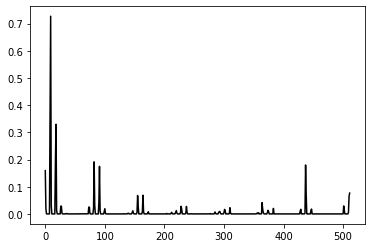

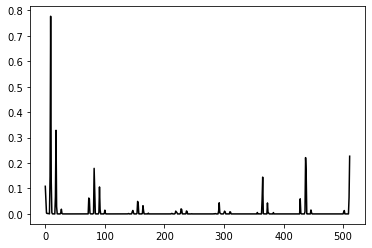

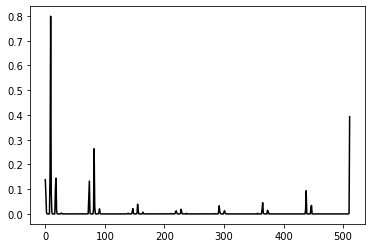

In [ ]:
#images = {}
#index = {}

print('show histogram for key frame images')
#In Python, the glob module is used to retrieve files/pathnames
for imagePath in glob.glob("/KeyFrame_Extract/MyDrive/KeyFrame/Process_Frame/keyframe/*.jpg"):
  #or for imagePath in glob.glob("/KeyFrame/MyDrive/KeyFrame/data/*.*"):
  #print('imagePath   :  ' ,imagePath)

  #imagePath[imagePath.rfind("/") + 1:] er jonno data folder er vitorer image gulo name print korbe
  filename = imagePath[imagePath.rfind("/") + 1:]
  #print(filename)

  #cv2.imread() method loads an image from the specified file.
  image = cv2.imread(imagePath,1)
  #cv2.cvtColor() method is used to convert an image from one color space to another
  #images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
  #[8,8,8] mane 3D tai plot print korar agee flatten mane 1D kore nite hobe
  hist = cv2.normalize(hist,None).flatten()
  #index[filename] = hist
  # print the histrogram of all frame(322 frame)
  plt.plot(hist, color='k')
  plt.show()